In [ ]:
import os
import utils
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

file_path="result.json"

In [23]:
df = pd.read_json(file_path)

In [25]:
messages = utils.load_chat_data(file_path)

In [27]:
output_dir = './'
dates = utils.extract_dates(messages)
daily_counts = utils.count_messages_per_day(dates)

os.makedirs(output_dir, exist_ok=True)

plot_path = os.path.join(output_dir, "plot.png")
excel_path = os.path.join(output_dir, "output.xlsx")

utils.save_plot(daily_counts, plot_path)
utils.save_to_excel(daily_counts, excel_path)

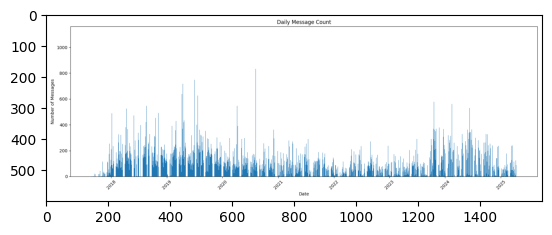

In [ ]:
img = plt.imread('plot.png')
plt.imshow(img)

## Time Series Analysis

In [35]:
df.head(10)

,name,type,id,messages
0,Artem,personal_chat,87689180,"{'id': 10579, 'type': 'message', 'date': '2017..."
1,Artem,personal_chat,87689180,"{'id': 10580, 'type': 'message', 'date': '2017..."
2,Artem,personal_chat,87689180,"{'id': 10581, 'type': 'message', 'date': '2017..."
3,Artem,personal_chat,87689180,"{'id': 10582, 'type': 'message', 'date': '2017..."
4,Artem,personal_chat,87689180,"{'id': 10583, 'type': 'message', 'date': '2017..."
5,Artem,personal_chat,87689180,"{'id': 10584, 'type': 'message', 'date': '2017..."
6,Artem,personal_chat,87689180,"{'id': 10585, 'type': 'message', 'date': '2017..."
7,Artem,personal_chat,87689180,"{'id': 10586, 'type': 'message', 'date': '2017..."
8,Artem,personal_chat,87689180,"{'id': 10587, 'type': 'message', 'date': '2017..."
9,Artem,personal_chat,87689180,"{'id': 10588, 'type': 'message', 'date': '2017..."


In [85]:
messages_df = pd.DataFrame(df["messages"].tolist())
messages_df = messages_df[['date', 'id']]
messages_df

,date,id
0,2017-08-27T19:15:06,10579
1,2017-08-27T19:15:23,10580
2,2017-08-27T19:15:23,10581
3,2017-08-27T19:15:31,10582
4,2017-08-27T19:15:34,10583
...,...,...
318186,2025-04-11T18:19:21,448930
318187,2025-04-11T18:19:25,448931
318188,2025-04-11T18:22:31,448932
318189,2025-04-11T18:26:50,448933


In [86]:
messages_df['date'] = pd.to_datetime(messages_df['date'])
messages_df

,date,id
0,2017-08-27 19:15:06,10579
1,2017-08-27 19:15:23,10580
2,2017-08-27 19:15:23,10581
3,2017-08-27 19:15:31,10582
4,2017-08-27 19:15:34,10583
...,...,...
318186,2025-04-11 18:19:21,448930
318187,2025-04-11 18:19:25,448931
318188,2025-04-11 18:22:31,448932
318189,2025-04-11 18:26:50,448933


In [87]:
messages_df = messages_df.set_index(messages_df['date'])
messages_df.drop('date', axis = 1, inplace = True)

In [88]:
messages_df

,id
date,
2017-08-27 19:15:06,10579
2017-08-27 19:15:23,10580
2017-08-27 19:15:23,10581
2017-08-27 19:15:31,10582
2017-08-27 19:15:34,10583
...,...
2025-04-11 18:19:21,448930
2025-04-11 18:19:25,448931
2025-04-11 18:22:31,448932


In [89]:
messages_df = messages_df.groupby(messages_df.index.date).count()


In [90]:
messages_df = messages_df.rename(columns={'id':'num_messages'})
messages_df

,num_messages
2017-08-27,22
2017-08-28,2
2017-08-29,18
2017-08-31,2
2017-09-07,2
...,...
2025-04-07,12
2025-04-08,8
2025-04-09,125
2025-04-10,27


Text(0.5, 1.0, 'Trend of the Time Series')

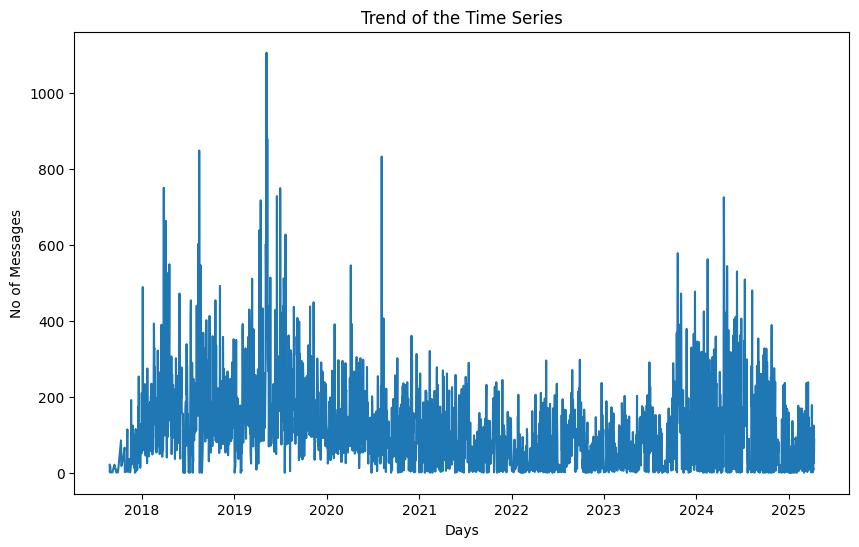

In [91]:
plt.figure(figsize= (10,6))
plt.plot(messages_df)
plt.xlabel('Days')
plt.ylabel('No of Messages')
plt.title('Trend of the Time Series')

### Seasonality

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='num_messages'>

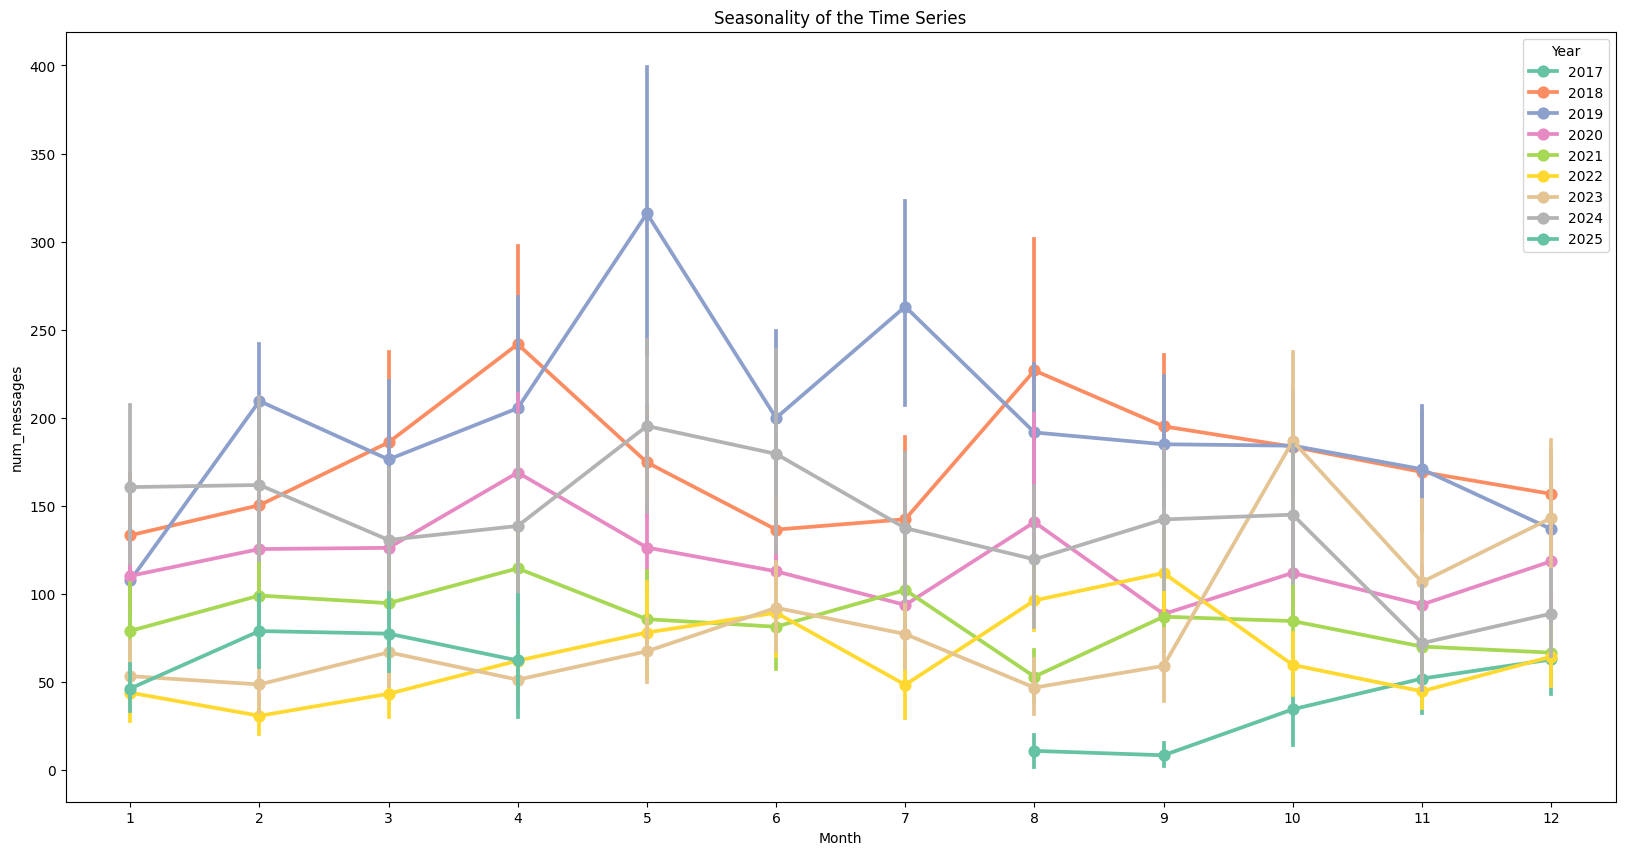

In [92]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = messages_df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

# Stacked line plot
plt.figure(figsize=(20, 10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month', y='num_messages', hue='Year', data=df_temp, palette='Set2')

### Decomposition

In [93]:
messages_df.index

Index([2017-08-27, 2017-08-28, 2017-08-29, 2017-08-31, 2017-09-07, 2017-09-15,
       2017-09-17, 2017-09-24, 2017-09-25, 2017-09-29,
       ...
       2025-04-01, 2025-04-02, 2025-04-03, 2025-04-04, 2025-04-05, 2025-04-07,
       2025-04-08, 2025-04-09, 2025-04-10, 2025-04-11],
      dtype='object', length=2667)

In [94]:
messages_df = messages_df.sort_index()

In [98]:
messages_df = messages_df.dropna()

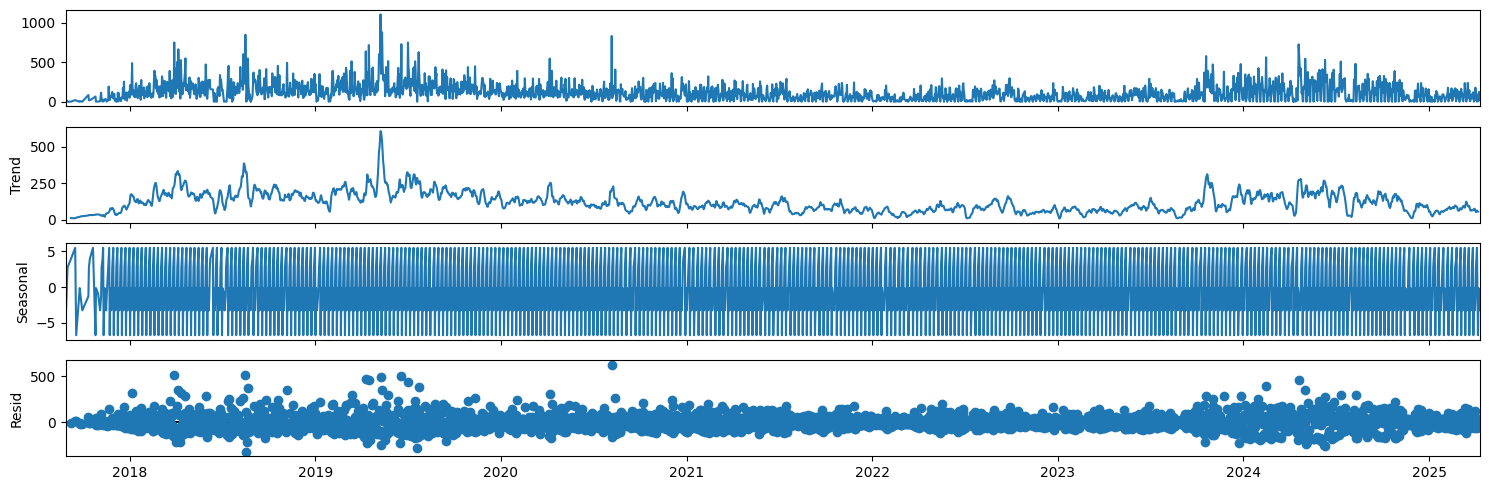

In [106]:
decomposition = sm.tsa.seasonal_decompose(messages_df, model='additive', period=8) 
plt.rcParams.update({'figure.figsize': (15,5)})
fig = decomposition.plot()